In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
print(df.shape)

(2938, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.isnull().sum()/len(df)*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [7]:
miss_values = df.isnull().sum()[df.isnull().sum()/len(df) != 0].index
miss_values

Index(['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
for i in miss_values:
    df.fillna(df[i].median(),axis=1,inplace= True)

In [9]:
df.isnull().sum()/len(df)*100

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

In [10]:
cat_cols = df.select_dtypes(include=object).columns
cat_cols

Index(['Country', 'Status'], dtype='object')

In [11]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [12]:
len(num_cols)

20

In [13]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Status', ylabel='count'>

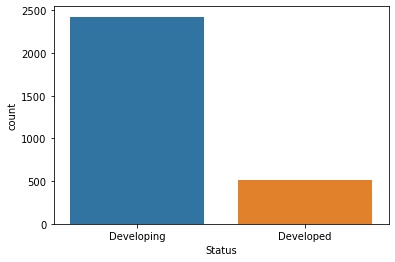

In [14]:
sns.countplot(df['Status'])

Text(0.5, 1.0, 'Schooling')

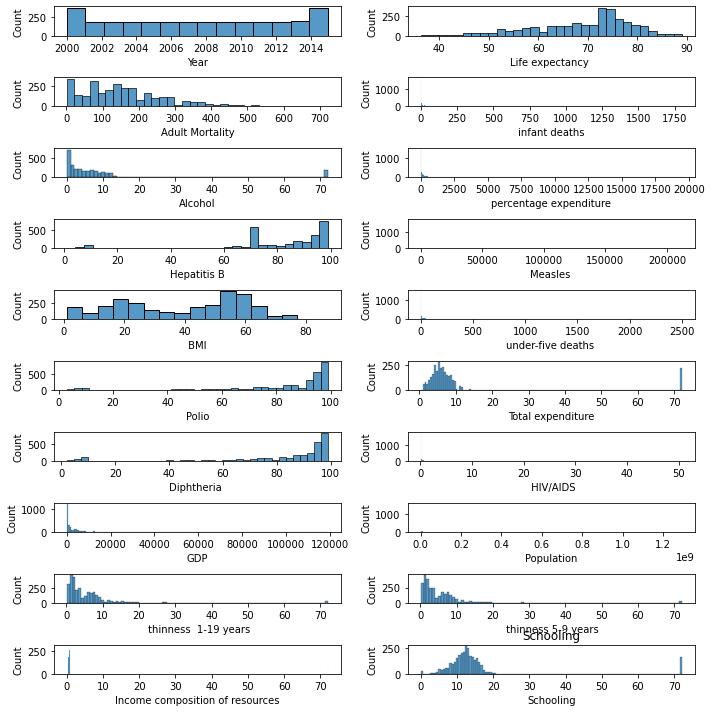

In [15]:
plt.figure(figsize=(10,10))
nrows = 10
ncols = 2
it = 1
for i in num_cols:
    plt.subplot(nrows,ncols,it)
    sns.histplot(df[i])
    it +=1
plt.tight_layout()
plt.title(i)
    

In [42]:
num_cols

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

Text(0.5, 1.0, 'Schooling')

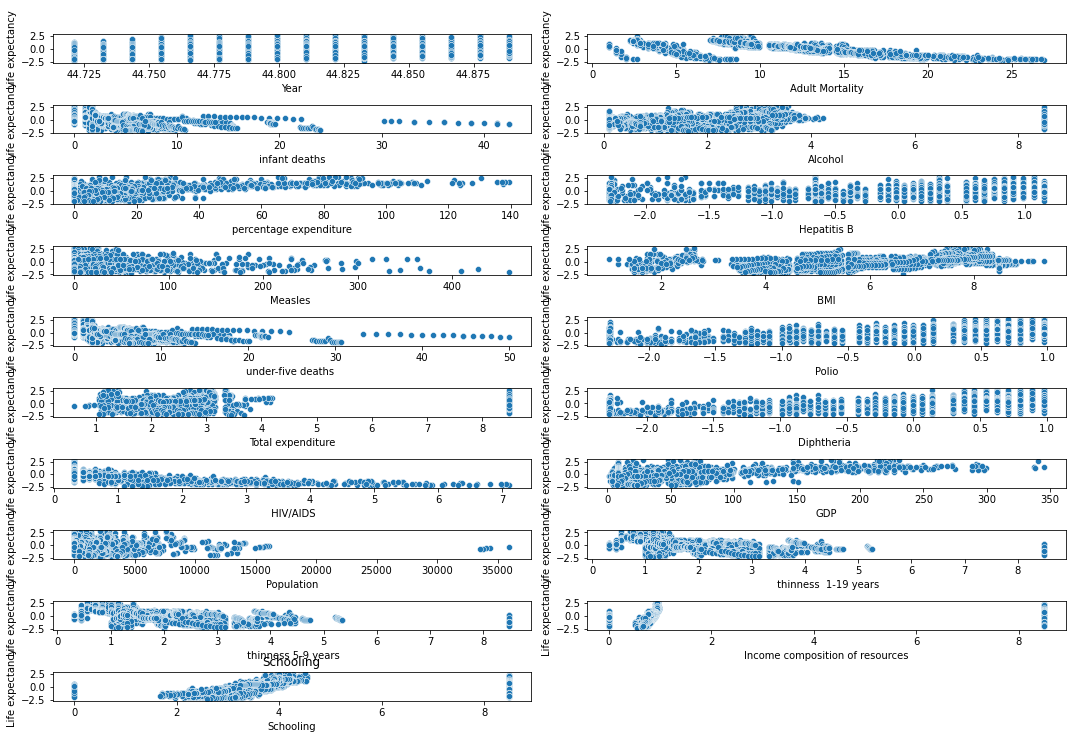

In [45]:
plt.figure(figsize=(15,10))
num_cols1 = ['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
nrows = 10
ncols = 2
it = 1
for i in num_cols1:
    plt.subplot(nrows,ncols,it)
    sns.scatterplot(df[i],df['Life expectancy '])
    it +=1
plt.tight_layout()
plt.title(i)
    

In [46]:
cat_cols

Index(['Country', 'Status'], dtype='object')

<AxesSubplot:xlabel='Status', ylabel='Life expectancy '>

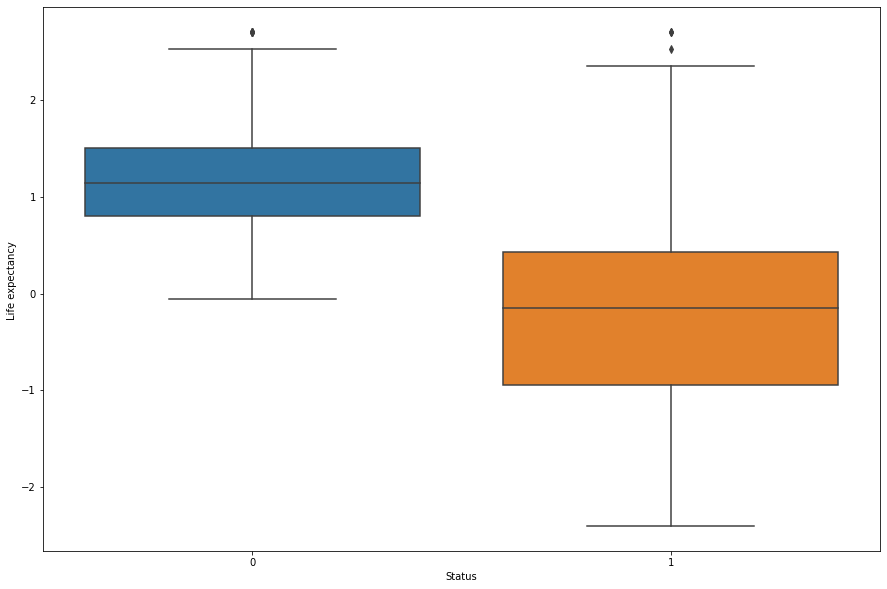

In [51]:
plt.figure(figsize=(15,10))

sns.boxplot(df['Status'],df['Life expectancy '])

<AxesSubplot:>

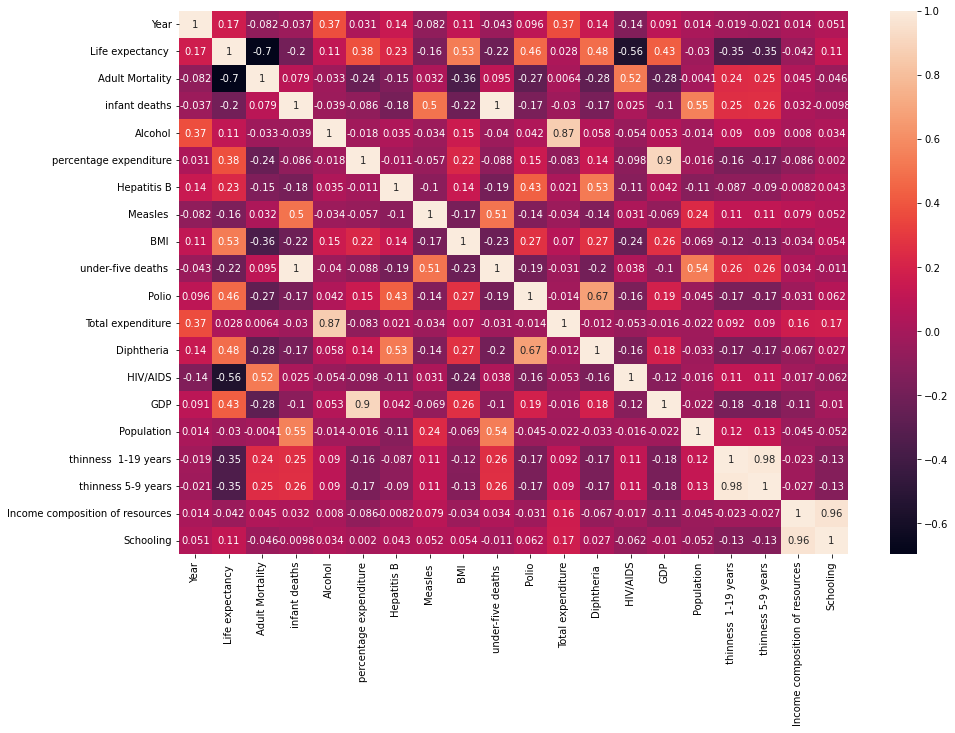

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [17]:
# before transform
df.skew()

Year                               -0.006409
Life expectancy                    -0.642391
Adult Mortality                     1.179247
infant deaths                       9.786963
Alcohol                             3.195879
percentage expenditure              4.652051
Hepatitis B                        -1.861573
Measles                             9.441332
 BMI                               -0.214346
under-five deaths                   9.495065
Polio                              -2.092703
Total expenditure                   3.076708
Diphtheria                         -2.067868
 HIV/AIDS                           5.396112
GDP                                 3.506374
Population                         17.936158
 thinness  1-19 years               5.848226
 thinness 5-9 years                 5.772554
Income composition of resources     3.828895
Schooling                           3.534065
dtype: float64

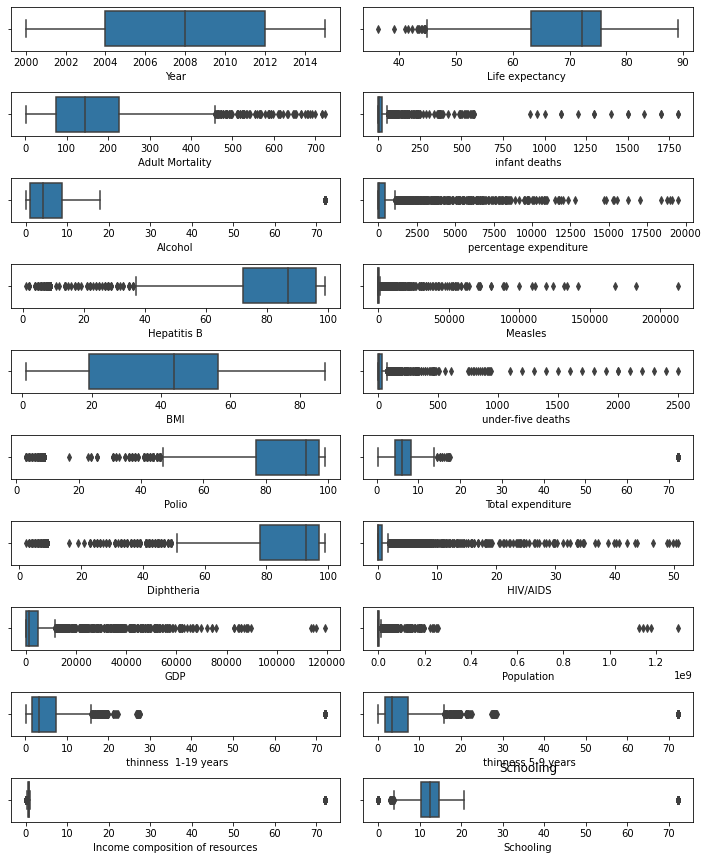

In [19]:
plt.figure(figsize=(10,14))

nrows = 12
ncols = 2
it = 1
for i in num_cols:
    plt.subplot(nrows,ncols,it)
    sns.boxplot(df[i])
    it +=1
plt.tight_layout()
plt.title(i)
plt.show()

In [20]:
transform = [ 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 
       'Measles ', ' BMI ', 'under-five deaths ',  'Total expenditure',
        ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

for i in transform:
    df[i] = np.sqrt(df[i])

In [21]:
transform2 = ['Life expectancy ','Hepatitis B','Polio','Diphtheria ']

In [22]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df[transform2] = pt.fit_transform(df[transform2])

In [23]:
#after transform
df.skew()

Year                              -0.007765
Life expectancy                   -0.105437
Adult Mortality                    0.100762
infant deaths                      3.585672
Alcohol                            1.867879
percentage expenditure             2.356826
Hepatitis B                       -0.714016
Measles                            4.172346
 BMI                              -0.652078
under-five deaths                  3.492444
Polio                             -1.010221
Total expenditure                  2.690768
Diphtheria                        -1.026114
 HIV/AIDS                          2.855992
GDP                                1.856483
Population                         4.759980
 thinness  1-19 years              2.138440
 thinness 5-9 years                2.082179
Income composition of resources    3.752428
Schooling                          2.483763
dtype: float64

In [24]:
# stats
cat_cols

Index(['Country', 'Status'], dtype='object')

In [25]:
stats.jarque_bera(df['Life expectancy '])

Jarque_beraResult(statistic=41.14018604423124, pvalue=1.1655263421062045e-09)

In [26]:
stats.shapiro(df['Life expectancy '])

ShapiroResult(statistic=0.9826021790504456, pvalue=1.5881953581006684e-18)

In [28]:
stats.f_oneway(df[df['Status'] == 'Developing']['Life expectancy '],
              df[df['Status'] == 'Developed']['Life expectancy '])

F_onewayResult(statistic=1165.6851640407733, pvalue=1.896875367198577e-215)

In [29]:
# stats
num_cols

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [30]:
num_cols1 = ['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

for i in num_cols1:
    print(stats.shapiro(df[i]))

ShapiroResult(statistic=0.94605553150177, pvalue=1.573736908102623e-31)
ShapiroResult(statistic=0.9897525906562805, pvalue=1.0677397822237561e-13)
ShapiroResult(statistic=0.6649900078773499, pvalue=0.0)
ShapiroResult(statistic=0.7824894785881042, pvalue=0.0)
ShapiroResult(statistic=0.7152143716812134, pvalue=0.0)
ShapiroResult(statistic=0.8896985054016113, pvalue=1.2152060282624814e-41)
ShapiroResult(statistic=0.5047242641448975, pvalue=0.0)
ShapiroResult(statistic=0.9153562784194946, pvalue=9.978592554595992e-38)
ShapiroResult(statistic=0.6671134233474731, pvalue=0.0)
ShapiroResult(statistic=0.8417558073997498, pvalue=0.0)
ShapiroResult(statistic=0.5802175998687744, pvalue=0.0)
ShapiroResult(statistic=0.841221034526825, pvalue=0.0)
ShapiroResult(statistic=0.5746304988861084, pvalue=0.0)
ShapiroResult(statistic=0.7730681896209717, pvalue=0.0)
ShapiroResult(statistic=0.5977493524551392, pvalue=0.0)
ShapiroResult(statistic=0.8439083099365234, pvalue=0.0)
ShapiroResult(statistic=0.8505757

In [31]:
num_cols1 = ['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

for i in num_cols1:
    print(stats.jarque_bera(df[i]))

Jarque_beraResult(statistic=180.34927150819016, pvalue=0.0)
Jarque_beraResult(statistic=14.135497989921804, pvalue=0.0008521491438726603)
Jarque_beraResult(statistic=55346.621762627045, pvalue=0.0)
Jarque_beraResult(statistic=3564.304580377242, pvalue=0.0)
Jarque_beraResult(statistic=7405.869231848572, pvalue=0.0)
Jarque_beraResult(statistic=270.65623792399725, pvalue=0.0)
Jarque_beraResult(statistic=71254.84001652892, pvalue=0.0)
Jarque_beraResult(statistic=259.6340073462379, pvalue=0.0)
Jarque_beraResult(statistic=49335.51140083844, pvalue=0.0)
Jarque_beraResult(statistic=503.76782480582136, pvalue=0.0)
Jarque_beraResult(statistic=8388.422188388355, pvalue=0.0)
Jarque_beraResult(statistic=517.7583233007493, pvalue=0.0)
Jarque_beraResult(statistic=14799.548947017423, pvalue=0.0)
Jarque_beraResult(statistic=3026.1476561397085, pvalue=0.0)
Jarque_beraResult(statistic=219584.59004069405, pvalue=0.0)
Jarque_beraResult(statistic=11994.105371590706, pvalue=0.0)
Jarque_beraResult(statistic=1

In [32]:
num_cols1 = ['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

for i in num_cols1:
    print(stats.ttest_ind(df[i],df['Life expectancy ']))
    

Ttest_indResult(statistic=2424.9723326212097, pvalue=0.0)
Ttest_indResult(statistic=126.53199982260462, pvalue=0.0)
Ttest_indResult(statistic=37.51669947589042, pvalue=2.454104975176211e-276)
Ttest_indResult(statistic=56.178422198223345, pvalue=0.0)
Ttest_indResult(statistic=40.03612213540584, pvalue=0.0)
Ttest_indResult(statistic=1.223346035725249e-14, pvalue=0.9999999999999902)
Ttest_indResult(statistic=25.276490707045465, pvalue=6.672702880388629e-134)
Ttest_indResult(statistic=151.23388580503095, pvalue=0.0)
Ttest_indResult(statistic=37.56373000087554, pvalue=5.902777930836506e-277)
Ttest_indResult(statistic=1.955500102560815e-14, pvalue=0.9999999999999843)
Ttest_indResult(statistic=78.11618137266022, pvalue=0.0)
Ttest_indResult(statistic=4.5875476339696836e-15, pvalue=0.9999999999999963)
Ttest_indResult(statistic=31.404225381805897, pvalue=2.960416879336943e-200)
Ttest_indResult(statistic=51.03642637295331, pvalue=0.0)
Ttest_indResult(statistic=33.397687857474764, pvalue=4.5037163

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Status'] = le.fit_transform(df['Status'])

In [34]:
from sklearn.model_selection import train_test_split
x = df.drop('Life expectancy ',1)
y = df['Life expectancy ']

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df1 = ss.fit_transform(x)
x1 = pd.DataFrame(data = df1,columns=x.columns)

In [36]:
x1.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-1.691042,1.620821,0.459399,0.884658,1.044356,-1.112535,-0.353061,-1.008531,0.295541,-0.832649,1.014200,-2.297049,0.004156,-1.267564,-0.500968,-0.525282,1.549594,1.788809,1.780352,-0.285685,-0.398802
1,-1.691042,1.404422,0.459399,0.933964,1.072415,-1.112535,-0.347025,-1.142709,0.031066,-0.863344,1.045001,-1.551270,0.006208,-1.392016,-0.500968,-0.515264,-0.402839,1.819739,1.800732,-0.286891,-0.410980
2,-1.691042,1.187969,0.459399,0.915560,1.100039,-1.112535,-0.347838,-1.054213,-0.001342,-0.894455,1.075269,-1.400665,0.001074,-1.310213,-0.500968,-0.508683,1.484255,1.840211,1.820997,-0.289316,-0.423218
3,-1.691042,0.971462,0.459399,0.940076,1.140701,-1.112535,-0.334776,-0.914271,0.717765,-0.925999,1.114843,-1.186696,0.040709,-1.178699,-0.500968,-0.495774,0.100710,1.860569,1.851179,-0.292165,-0.435518
4,-1.691042,0.754902,0.459399,0.958344,1.167320,-1.112535,-0.617581,-0.865682,0.764846,-0.951557,1.153576,-1.140331,-0.025880,-1.132454,-0.500968,-0.804494,0.027294,1.890893,1.871162,-0.295860,-0.472800


In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,train_size=0.7,random_state=42)
print(xtrain.shape)
print(ytrain.shape)

(2056, 21)
(2056,)


In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain,ytrain).predict(xtrain)

from sklearn.metrics import r2_score,mean_squared_error
model_tr = r2_score(ytrain,model)
print('r2_score',model_tr)

r2_score 0.8106229751499265


In [39]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

model_dt = dt.fit(xtrain,ytrain).predict(xtrain)

from sklearn.metrics import r2_score,mean_squared_error
model_tr_dt = r2_score(ytrain,model_dt)
print('r2_score',model_tr_dt)

r2_score 1.0


<AxesSubplot:xlabel='IMP', ylabel='Features'>

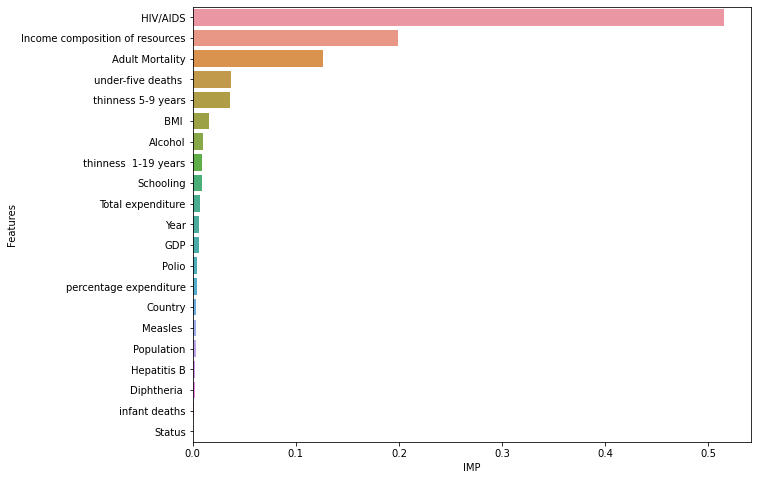

In [41]:
plt.figure(figsize=(10,8))
feature_imp_dt = pd.DataFrame()
feature_imp_dt['Features'] = xtrain.columns
feature_imp_dt['IMP'] = dt.feature_importances_
feature_imp1 = feature_imp_dt.sort_values('IMP',ascending=False)
sns.barplot(feature_imp1['IMP'],feature_imp1['Features'])